# Linear Regression
The Whopper has been Burger King’s signature sandwich since 1957. One Double Whopper with cheese provides 53 grams of protein! That's all the protein you need in a day. It also supplies 1020 calories and 65 grams of fat 😲😲😲. FYI - the Daily Value (based on a 2000-calorie diet) for fat is 65 grams. So after a Double Whopper you’ll want the rest of your calories that day to be fat-free. Of course, the Whopper isn’t the only item Burger King sells. How are fat and protein related on the entire BK menu? The scatterplot of the Fat (in grams) versus the Protein (in grams) for foods sold at Burger King shows a positive, moderately strong, linear relationship.
![Scatterplot of BK](https://raw.githubusercontent.com/SSpindt/AI/refs/heads/main/Semester%201/Problem%20Set%20Images/BKScatter.png)
If you want 25 grams of protein in your lunch, how much fat should you expect to consume at Burger King? The correlation between Fat and Protein is 0.83, a sign that the linear association seen in the scatterplot is fairly strong. But strength of the relationship is only part of the picture. The correlation says, “The linear association between these two variables is fairly strong,” but it doesn’t tell us what the line actually is.
Now we can say more; the equation will let us predict the fat content for any Burger King food, given its amount of protein. 

For the Burger King foods, we’d choose a linear model to describe the relationship between Protein and Fat.
Of course, no line can go through all the points, but a linear model can summarize the general pattern with only a couple of parameters. Like all models of the real world, the line will be wrong — wrong in the sense that it can’t match reality exactly. But it can help us understand how the variables are associated.
Not only can’t we draw a line through all the points, the best line might not even hit any of the points. Then how can it be the “best” line? We want to find the line that somehow comes closer to all the points than any other line. Some of the points will be above the line and some below. For example, the line might suggest that a BK Broiler chicken sandwich with 30 grams of protein should have 36 grams of fat when, in fact, it actually has only 25 grams of fat. The BK Broiler chicken residual would be `actual - predicted = 25 - 36 = -11 g of fat`. The negative residual tells us that the actual fat content of the BK Broiler chicken is about 11 grams less than the model predicts for a typical Burger King menu item with 30 grams of protein. Our challenge now is how to find the right line.

When we draw a line through a scatterplot, some residuals are positive and some negative. We can’t assess how well the line fits by adding up all the residuals—the positive and negative ones would just cancel each other out. We faced the same issue when we calculated a standard deviation to measure spread. And we deal with it the same way here: by squaring the residuals. Squaring makes them all positive. Now we can add them up. Squaring also emphasizes the large residuals. After all, points near the line are consistent with the model, but we’re more concerned about points far from the line. When we add all the squared residuals together, that sum indicates how well the line we drew fits the data — the smaller the sum, the better the fit. A different line will produce a different sum, maybe bigger, maybe smaller. The **line of best fit** is the line for which the sum of squared residuals is smallest! We call this line the **least squares line**. It can be described as `y = mx + b `or more generically as `y = b0 + b1x` (*b0 is the y intercept and b1 is the slope*).You can use the line of best fit to make predictions -- all you have to do is plug in your value for x and solve for y!

## <span style="color:blue">Your Turn</span>
Please solve the following problems using Python, Markdown, and this [data set about movies](https://drive.google.com/file/d/1QmsmZSTI9VOesBH4yL_8LHTxV63Gz2hv/view?usp=drive_link). 

## <span style="color:blue">Problem 1</span>
First, examine the relationship between `budget` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `critics score`? How do you know?
2. Define a function that returns the equation of the line of best fit for `budget` and `critics score`. What is that equation? *You can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its budget was $10 million? How accurate is this prediction?

In [8]:
import pandas as pd
import seaborn as sns
import numpy as np

In [9]:
df = pd.read_json("problem_set.json")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   critics score (percent)           1000 non-null   float64
 1   budget (millions)                 1000 non-null   float64
 2   length (minutes)                  1000 non-null   float64
 3   curse words used (rate per hour)  1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


<AxesSubplot:xlabel='budget (millions)', ylabel='critics score (percent)'>

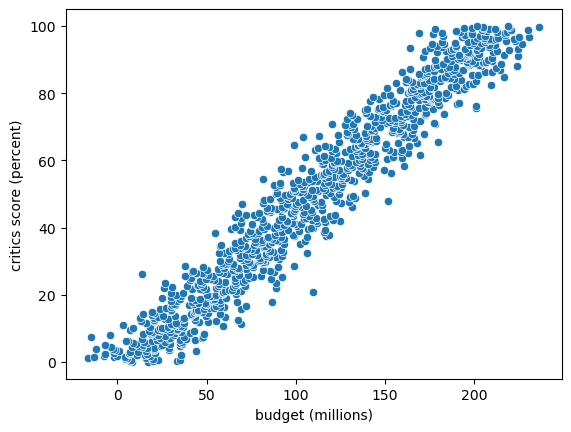

In [12]:
sns.scatterplot(data = df, x='budget (millions)', y='critics score (percent)')

In [17]:
df["budget (millions)"].corr(df['critics score (percent)'])

0.9697766428756551

**By looking at the scatter plot i can determine that budget and critics score do have a relationship. They have a strong positive linear relationship due to the correlation coeffecient being 0.969 making them almost directly related to eachother. **

In [31]:
def lin_reg(df, x, y):
    '''
    This function determines the best slope and intercept for two varibles, x and y.
    '''
    m = 0
    for count in range(1000):
        m = m + 1
        b = 0

        # Calculate residuals (y = mx+b)
        res = 0
        for i in range(len(df)):
            pred_y = (m * df.loc[i][x]) + b
            act_y = df.loc[i][y]
            temp = act_y - pred_y 
            temp = temp ** 2
            res = res + temp
        print(res)
    return (m, b, res)

In [44]:
#for line in range(len(df)):
    

In [45]:
 lin_reg(df,"budget (millions)",'critics score (percent)')

4715518.227187919
37655289.711490355
102154316.12124312
198212597.4564462
325830133.7170997
485006924.9032033
675742971.0147579
898038272.051762
1151892828.0142171
1437306638.9021235
1754279704.7154784
2102812025.4542837
2482903601.1185393
2894554431.708246
3337764517.223404
3812533857.664012
4318862453.0300665
4856750303.321583
5426197408.538532
6027203768.680943
6659769383.748798
7323894253.742117
8019578378.660868
8746821758.505072
9505624393.27475
10295986282.969864
11117907427.590412
11971387827.136425
12856427481.607885
13773026391.004805
14721184555.327168
15700901974.57498
16712178648.748236
17755014577.84694
18829409761.871098
19935364200.820724
21072877894.695816
22241950843.49631
23442583047.222286
24674774505.873707
25938525219.450527
27233835187.95289
28560704411.380623
29919132889.733833
31309120623.01252
32730667611.216625
34183773854.346207
35668439352.40124
37184664105.38171
38732448113.28759
40311791376.11901
41922693893.87579
43565155666.5581
45239176694.165794
46944

(100, 0, 156359698538.53265)

 lin_reg(df,"budget (millions)",'critics score (percent)')

In [4]:
# Write the code you need for question 3 here.

In [27]:
df.loc[df["budget (millions)"] == 10]

,critics score (percent),budget (millions),length (minutes),curse words used (rate per hour)


<AxesSubplot:xlabel='budget (millions)', ylabel='critics score (percent)'>

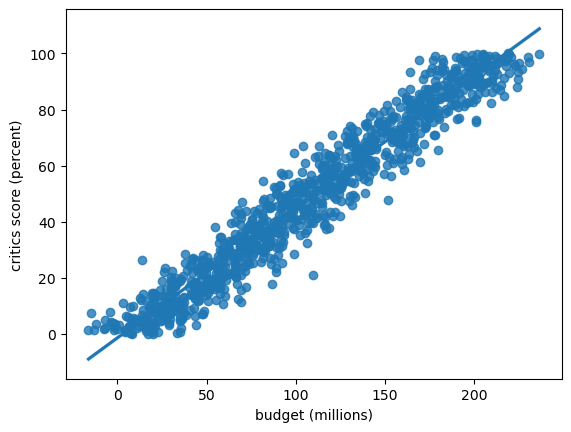

In [22]:
sns.regplot(data=df, x="budget (millions)", y="critics score (percent)")

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 2</span>
Now, examine the relationship between `length` and `critics score`. Then, answer these questions:
1. What kind of relationship is found between `length` and `critics score`? How do you know?
2. If you haven't done so already, please generalize your Linear Regression function so that it works on all kinds of quantitative data. Once you are done generalizing your function, call it using `length` and `critics score` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, what score would a movie receive if its length was 150 minutes? How accurate is this prediction?

In [5]:
# Write the code you need for question 1 here.

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

In [6]:
# Write the code you need for question 2 here. 
# If you generalized your function in Problem 1, 
# please just copy and paste your function definition and call below.

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

In [7]:
# Write the code you need for question 3 here.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 3</span>
Finally, examine the relationship between `budget` and `curse words used`. Then, answer these questions:
1. What kind of relationship is found between `budget` and `curse words used`? How do you know?
2. Generalize your Linear Regression function even more. You should be able to call it and have it work on any quantitative data without changing anything about the function definition. Once you are done generalizing your function, call it using `budget` and `curse words used` as arguments. What is the equation of the best fit line? *Reminder, you can only use standard Python and Pandas in your function. You cannot use Numpy or any other Python library.*
3. According to your line of best fit, how many curse words would be used during a movie if it had a $5 million dollar budget? How accurate is this prediction?

In [ ]:
# Write the code you need for question 1 here.

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

In [ ]:
# Write the code you need for question 2 here.
# If you generalized your function in Problem 1 or Problem 2, 
# please just copy and paste your function definition and call below.

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

In [ ]:
# Write the code you need for question 3 here.

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***

## <span style="color:blue">Problem 4</span>
Compare Linear Regression algorithms with someone from a different table. Then, answer these questions:
1. How are your algorithms similar? Different?
2. Whose algorithm was more accurate for problem 1? Problem 2? Problem 3?
3. Why do you think that algorithm was more accurate for one or all of these problems?

***Answer question 1 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 2 here. Please use complete sentences and quantitative evidence in your answer.***

***Answer question 3 here. Please use complete sentences and quantitative evidence in your answer.***